# Object Detection Using Faster RCNN

We will use the https://github.com/GitarthVaishnav/FasterRCNN42028.git repository for this part of the assignment

# Step 1: Clone the Repository

In [ ]:
!git clone https://github.com/GitarthVaishnav/FasterRCNN42028.git










Cloning into 'FasterRCNN42028'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 124 (delta 51), reused 108 (delta 37), pack-reused 0
Receiving objects: 100% (124/124), 4.28 MiB | 20.96 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [ ]:
# Enter the repo directory.
%cd FasterRCNN42028/

/content/FasterRCNN42028


# Step 2: Create new envirnoment and install the requirements

Create new environment

In [ ]:
!pip install virtualenv
!virtualenv newenvi
!source newenvi/bin/activate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 45.5 MB/s eta 0:00:00
created virtual environment CPython3.10.11.final.0-64 in 649ms
  creator CPython3Posix(dest=/content/FasterRCNN42028/newenvi, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.1.2, setuptools==67.7.2, wheel==0.40.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


Install the requirements

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 94.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 

# Step 3: Download the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd /content/FasterRCNN42028
!unzip /content/drive/MyDrive/faster_rcnn_Od_ass2/dataset_42028assg2_14081525__.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: Object_Detection/yolo/train/labels/100559.txt  
  inflating: Object_Detection/yolo/train/labels/101009.txt  
  inflating: Object_Detection/yolo/train/labels/101126.txt  
  inflating: Object_Detection/yolo/train/labels/101124.txt  
  inflating: Object_Detection/yolo/train/labels/101530.txt  
  inflating: Object_Detection/yolo/train/labels/101592.txt  
  inflating: Object_Detection/yolo/train/labels/100695.txt  
  inflating: Object_Detection/yolo/train/labels/100068.txt  
  inflating: Object_Detection/yolo/train/labels/102007.txt  
  inflating: Object_Detection/yolo/train/labels/101916.txt  
  inflating: Object_Detection/yolo/train/labels/100010.txt  
  inflating: Object_Detection/yolo/train/labels/100838.txt  
  inflating: Object_Detection/yolo/train/labels/100693.txt  
  inflating: Object_Detection/yolo/train/labels/100595.txt  
  inflating: Object_Detection/yolo/train/labels/100368.txt  
  inflating: Objec

# Step 4: Check and delete invalid JPEG files annotations from the dataset

These lines were written with the help of Chat GPT 3, to put jpg images in one folder, and xml files in another folder. First we do this in the /train (training) folder and then we do it on the /valid (validation) folder. With this structure we can then execute the lines that clean the data.

In [ ]:
import os
import shutil

# specify the input folder containing images and annotations
input_folder = "/content/FasterRCNN42028/Object_Detection/pascal/train"

# specify the output folders for images and annotations
output_img_folder = "/content/FasterRCNN42028/Object_Detection/pascal/train/img"
output_xml_folder = "/content/FasterRCNN42028/Object_Detection/pascal/train/xml"

# create output folders if they don't exist
if not os.path.exists(output_img_folder):
    os.makedirs(output_img_folder)
if not os.path.exists(output_xml_folder):
    os.makedirs(output_xml_folder)

# iterate over files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg'):
        # move image file to output image folder
        shutil.move(os.path.join(input_folder, filename), output_img_folder)
    elif filename.endswith('.xml'):
        # move annotation file to output xml folder
        shutil.move(os.path.join(input_folder, filename), output_xml_folder)


In [ ]:
# specify the input folder containing images and annotations
input_folder = "/content/FasterRCNN42028/Object_Detection/pascal/valid"

# specify the output folders for images and annotations
output_img_folder = "/content/FasterRCNN42028/Object_Detection/pascal/valid/img"
output_xml_folder = "/content/FasterRCNN42028/Object_Detection/pascal/valid/xml"

# create output folders if they don't exist
if not os.path.exists(output_img_folder):
    os.makedirs(output_img_folder)
if not os.path.exists(output_xml_folder):
    os.makedirs(output_xml_folder)

# iterate over files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg'):
        # move image file to output image folder
        shutil.move(os.path.join(input_folder, filename), output_img_folder)
    elif filename.endswith('.xml'):
        # move annotation file to output xml folder
        shutil.move(os.path.join(input_folder, filename), output_xml_folder)

In [ ]:
# specify the input folder containing images and annotations
input_folder = "/content/FasterRCNN42028/Object_Detection/pascal/test"

# specify the output folders for images and annotations
output_img_folder = "/content/FasterRCNN42028/Object_Detection/pascal/test/img"
output_xml_folder = "/content/FasterRCNN42028/Object_Detection/pascal/test/xml"

# create output folders if they don't exist
if not os.path.exists(output_img_folder):
    os.makedirs(output_img_folder)
if not os.path.exists(output_xml_folder):
    os.makedirs(output_xml_folder)

# iterate over files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg'):
        # move image file to output image folder
        shutil.move(os.path.join(input_folder, filename), output_img_folder)
    elif filename.endswith('.xml'):
        # move annotation file to output xml folder
        shutil.move(os.path.join(input_folder, filename), output_xml_folder)

Now that we have the right structure, we can clean the data. First we do it in the training folder.

In [ ]:
# SIMPLIFY
from struct import unpack
from tqdm import tqdm
import os


marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()
    
    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]            
            if len(data)==0:
                break        


bads = []
#root_img = "/content/gdrive/MyDrive/42028/Week9/SSD/customTF2/data/images"
#root_annot = "/content/gdrive/MyDrive/42028/Week9/SSD/customTF2/data/annotations"
root_img = '/content/FasterRCNN42028/Object_Detection/pascal/train/img'
root_annot = '/content/FasterRCNN42028/Object_Detection/pascal/train/xml'
images = os.listdir( root_img )
for img in tqdm(images):
  image = os.path.join(root_img,img)
  image = JPEG(image) 
  try:
    image.decode()   
  except:
    bads.append(img)


for name in bads:
  os.remove(os.path.join(root_img,name))
  os.remove(os.path.join(root_annot,str(name[:-3]+"xml")))

100%|██████████| 1435/1435 [00:00<00:00, 15540.96it/s]


Now we clean the data on the validation folder

In [ ]:
# SIMPLIFY
from struct import unpack
from tqdm import tqdm
import os


marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()
    
    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]            
            if len(data)==0:
                break        


bads = []
#root_img = "/content/gdrive/MyDrive/42028/Week9/SSD/customTF2/data/images"
#root_annot = "/content/gdrive/MyDrive/42028/Week9/SSD/customTF2/data/annotations"
root_img = '/content/FasterRCNN42028/Object_Detection/pascal/valid/img'
root_annot = '/content/FasterRCNN42028/Object_Detection/pascal/valid/xml'
images = os.listdir( root_img )
for img in tqdm(images):
  image = os.path.join(root_img,img)
  image = JPEG(image) 
  try:
    image.decode()   
  except:
    bads.append(img)


for name in bads:
  os.remove(os.path.join(root_img,name))
  os.remove(os.path.join(root_annot,str(name[:-3]+"xml")))

100%|██████████| 307/307 [00:00<00:00, 10111.44it/s]


Finally we clean the data on the test folder

In [ ]:
# SIMPLIFY
from struct import unpack
from tqdm import tqdm
import os


marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()
    
    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]            
            if len(data)==0:
                break        


bads = []
#root_img = "/content/gdrive/MyDrive/42028/Week9/SSD/customTF2/data/images"
#root_annot = "/content/gdrive/MyDrive/42028/Week9/SSD/customTF2/data/annotations"
root_img = '/content/FasterRCNN42028/Object_Detection/pascal/test/img'
root_annot = '/content/FasterRCNN42028/Object_Detection/pascal/test/xml'
images = os.listdir( root_img )
for img in tqdm(images):
  image = os.path.join(root_img,img)
  image = JPEG(image) 
  try:
    image.decode()   
  except:
    bads.append(img)


for name in bads:
  os.remove(os.path.join(root_img,name))
  os.remove(os.path.join(root_annot,str(name[:-3]+"xml")))

100%|██████████| 307/307 [00:00<00:00, 14603.53it/s]


# Step 5: Get the labels in the dataset

The following lines were written with the help of Chat GPT 3, to know which are the labels in the dataset

In [ ]:
# Get the labels present in the dataset

import os
import xml.etree.ElementTree as ET

# path to the directory containing the XML files
xml_dir = '/content/FasterRCNN42028/Object_Detection/pascal/train/xml'


# set to store the labels (no duplicates)
labels_set = set()

# iterate through each XML file in the directory
for filename in os.listdir(xml_dir):
    if filename.endswith('.xml'):
        # parse the XML file
        tree = ET.parse(os.path.join(xml_dir, filename))
        root = tree.getroot()

        # extract the label information
        for obj in root.findall('object'):
            label = obj.find('name').text
            labels_set.add(label)
            
# convert set to list and print
labels = list(labels_set)
print(labels)

['lift', 'jetski', 'dock', 'car', 'boat']


# Step 6: Create the Custom Dataset YAML File.

In [ ]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/content/FasterRCNN42028/Object_Detection/pascal/train/img'
TRAIN_DIR_LABELS: '/content/FasterRCNN42028/Object_Detection/pascal/train/xml'
VALID_DIR_IMAGES: '/content/FasterRCNN42028/Object_Detection/pascal/valid/img'
VALID_DIR_LABELS: '/content/FasterRCNN42028/Object_Detection/pascal/valid/xml'

# Class names.
CLASSES: [
    '__background__',
    'car',
    'dock',
    'boat',
    'jetski',
    'lift'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 6

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


# Step 7: Train the model

In [ ]:
!wandb disabled

W&B disabled.


In [ ]:
!python train.py --config data_configs/custom_data.yaml --epochs 15 --model fasterrcnn_resnet50_fpn_v2 --project-name maritime_detection --batch-size 4 --no-mosaic

Not using distributed mode
device cuda
2023-04-28 20:48:44.244568: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 20:48:46.221493: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Creating data loaders
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Number of training samples: 

# Step 8: Visualize Validation Results

In [ ]:
import matplotlib.pyplot as plt
import glob as glob

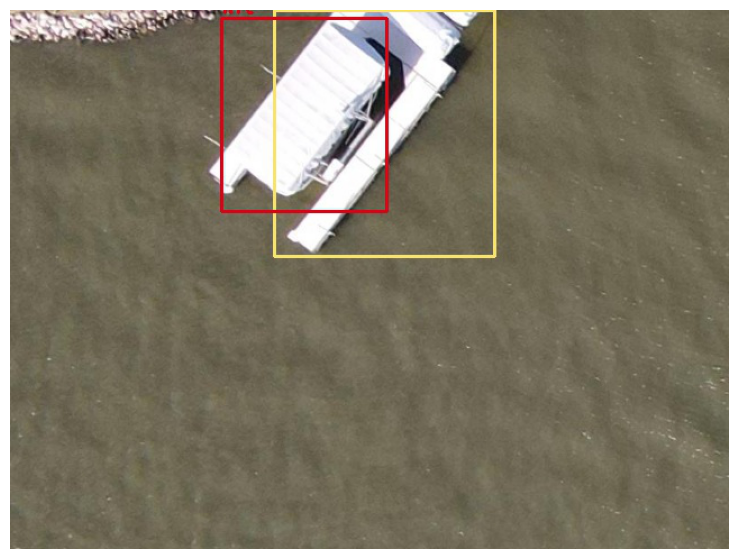

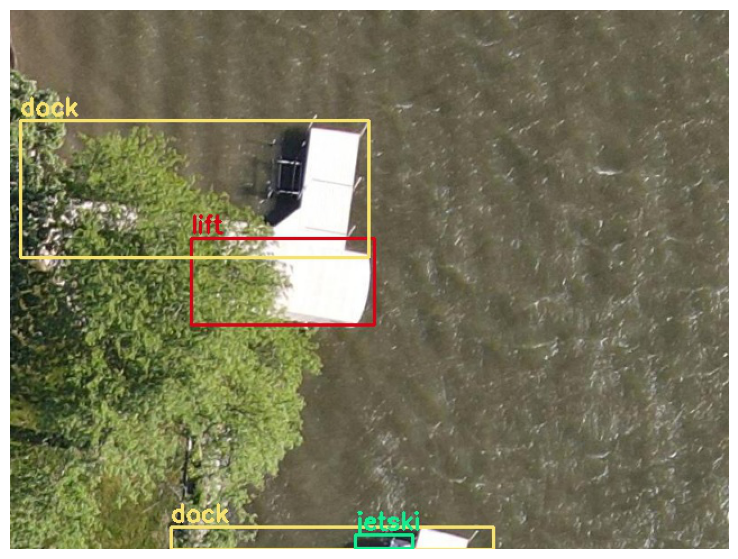

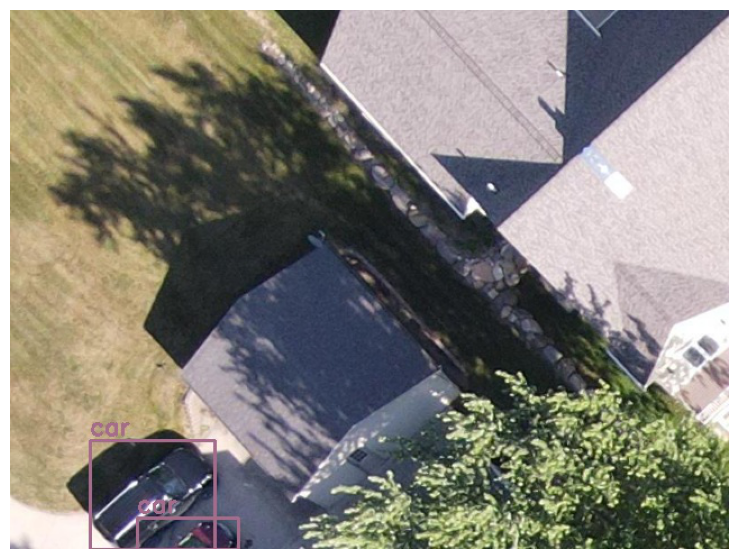

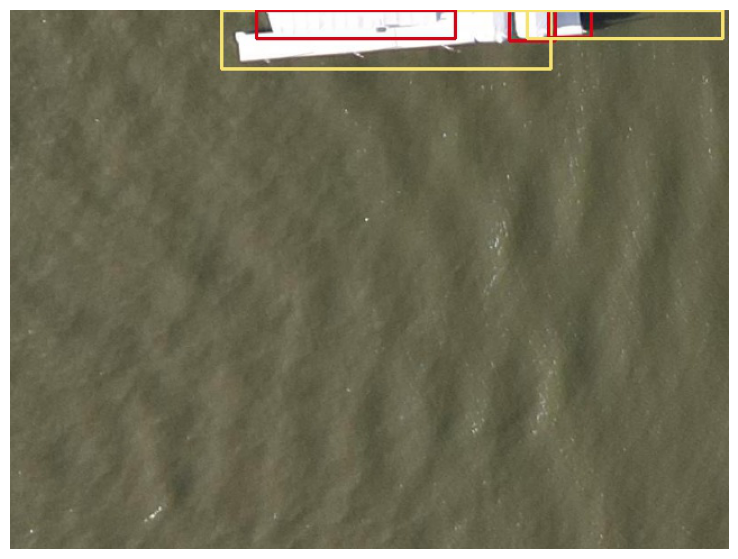

In [ ]:
results_dir_path = '/content/FasterRCNN42028/outputs/training/maritime_detection'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(4):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Step 9: Evaluate Results on validation dataset



In [ ]:
!python eval.py --weights outputs/training/maritime_detection/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  8% 3/39 [00:05<01:03,  1.75s/it]Removed invalid box tensor([209,   0, 273,   0]) of 5 from image index 93
100% 39/39 [00:52<00:00,  1.36s/it]


{'map': tensor(0.5508),
 'map_50': tensor(0.8583),
 'map_75': tensor(0.5841),
 'map_large': tensor(0.6974),
 'map_medium': tensor(0.4493),
 'map_per_class': tensor([0.5488, 0.5513, 0.5220, 0.4906, 0.6413]),
 'map_small': tensor(0.1441),
 'mar_1': tensor(0.4367),
 'mar_10': tensor(0.6219),
 'mar_100': tensor(0.6220),
 'mar_100_per_class': tensor([0.6025, 0.6375, 0.5950, 0.5724,

**mAP (IoU=0.50:0.95) on validation dataset: 0.551**

**mAP (IoU=0.50) on validation dataset: 0.8583**


# Step 10: Evaluate Results on training dataset


In order to evaluate results on the training dataset, we will change the values of VALID_DIR_IMAGES and VALID_DIR_LABELS to the paths of the training images and labels. In this way, the evaluation will be done on the training dataset.

In [ ]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/content/FasterRCNN42028/Object_Detection/pascal/train/img'
TRAIN_DIR_LABELS: '/content/FasterRCNN42028/Object_Detection/pascal/train/xml'
VALID_DIR_IMAGES: '/content/FasterRCNN42028/Object_Detection/pascal/train/img'
VALID_DIR_LABELS: '/content/FasterRCNN42028/Object_Detection/pascal/train/xml'

# Class names.
CLASSES: [
    '__background__',
    'car',
    'dock',
    'boat',
    'jetski',
    'lift'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 6

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Overwriting data_configs/custom_data.yaml


Now we do the evaluation on the training dataset using the weights we stored on Google Drive.

In [ ]:
!python eval.py --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100% 167M/167M [00:03<00:00, 48.7MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  8% 14/180 [00:19<03:12,  1.16s/it]Removed invalid box tensor([ 84,   0, 141,   0]) of 4 from image index 183
 27% 48/180 [00:59<02:38,  1.20s/it]Removed invalid box tensor([  0,  96,   0, 338]) of 2 from image index 448
Removed invalid box tensor([  0, 141,   0, 383]) of 2 from image index 450
 27% 49/18

**mAP (IoU=0.50:0.95) on training dataset: 0.833**

**mAP (IoU=0.50) on training dataset: 0.9932**


# Step 11: Evaluate Results on test dataset

In order to evaluate results on the test dataset, we will change the values of VALID_DIR_IMAGES and VALID_DIR_LABELS to the paths of the test images and labels. In this way, the evaluation will be done on the test dataset.

In [ ]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/content/FasterRCNN42028/Object_Detection/pascal/train/img'
TRAIN_DIR_LABELS: '/content/FasterRCNN42028/Object_Detection/pascal/train/xml'
VALID_DIR_IMAGES: '/content/FasterRCNN42028/Object_Detection/pascal/test/img'
VALID_DIR_LABELS: '/content/FasterRCNN42028/Object_Detection/pascal/test/xml'

# Class names.
CLASSES: [
    '__background__',
    'car',
    'dock',
    'boat',
    'jetski',
    'lift'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 6

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Overwriting data_configs/custom_data.yaml


Now we do the evaluation on the test dataset using the weights we stored on Google Drive.

In [ ]:
!python eval.py --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 39/39 [00:46<00:00,  1.20s/it]


{'map': tensor(0.5751),
 'map_50': tensor(0.8782),
 'map_75': tensor(0.6518),
 'map_large': tensor(0.7288),
 'map_medium': tensor(0.5046),
 'map_per_class': tensor([0.6028, 0.5372, 0.5751, 0.4920, 0.6684]),
 'map_small': tensor(0.1399),
 'mar_1': tensor(0.4543),
 'mar_10': tensor(0.6477),
 'mar_100': tensor(0.6477),
 'mar_100_per_class': tensor([0.6367, 0.6193, 0.6618, 0.5882, 0.7323]),
 'mar_large': tensor(0.8057),
 'mar_medium': tensor(0.5982),
 'mar_small': tensor(0.2472)}


"Cla

**mAP (IoU=0.50:0.95) on test dataset: 0.575**

**mAP (IoU=0.50) on test dataset: 0.8782**


# Step 12: Make inferences and display result images

In [ ]:
!python inference.py --input Object_Detection/pascal/train/img/100017.jpg --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.584


In [ ]:
import matplotlib.pyplot as plt

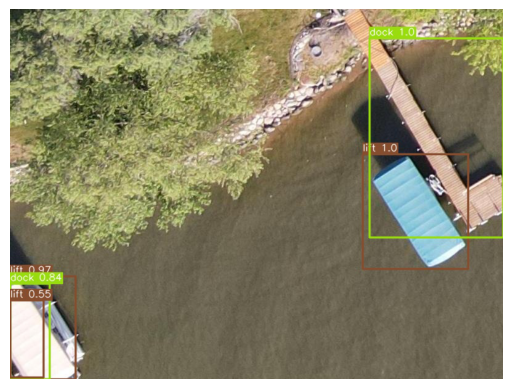

In [ ]:
image = plt.imread('/content/FasterRCNN42028/outputs/inference/res_1/100017.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!python inference.py --input /content/FasterRCNN42028/Object_Detection/pascal/test/img/100119.jpg --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.608


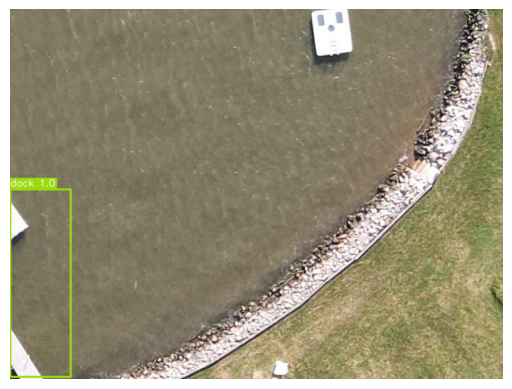

In [ ]:
image = plt.imread('/content/FasterRCNN42028/outputs/inference/res_5/100119.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!python inference.py --input /content/FasterRCNN42028/Object_Detection/pascal/test/img/100292.jpg --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.074


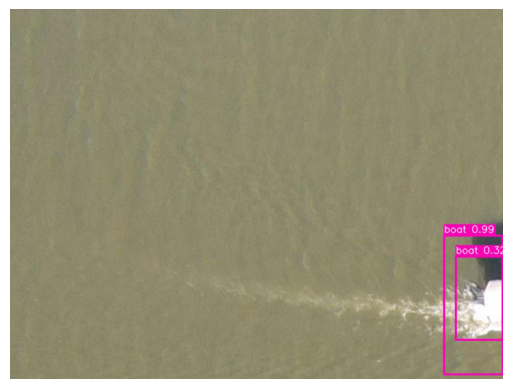

In [ ]:
image = plt.imread('/content/FasterRCNN42028/outputs/inference/res_6/100292.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!python inference.py --input /content/FasterRCNN42028/Object_Detection/pascal/test/img/101340.jpg --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.517


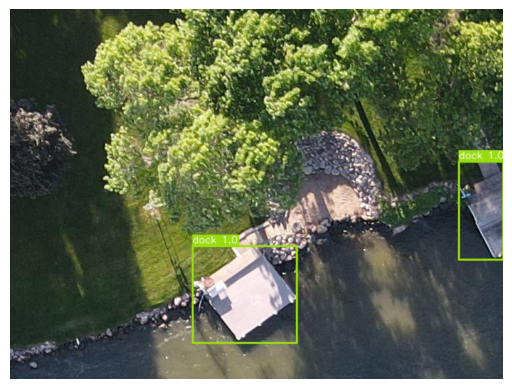

In [ ]:
image = plt.imread('/content/FasterRCNN42028/outputs/inference/res_8/101340.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!python inference.py --input /content/FasterRCNN42028/Object_Detection/pascal/test/img/100770.jpg --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.403


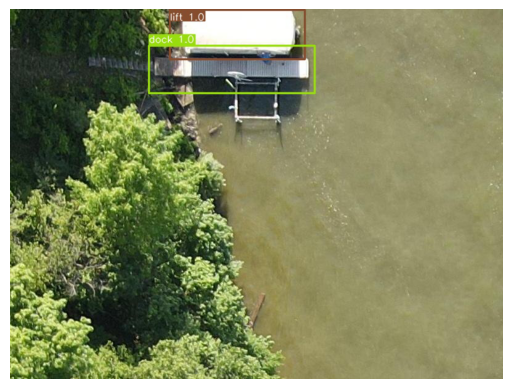

In [ ]:
image = plt.imread('/content/FasterRCNN42028/outputs/inference/res_9/100770.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!python inference.py --input /content/FasterRCNN42028/Object_Detection/pascal/test/img/101809.jpg --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.077


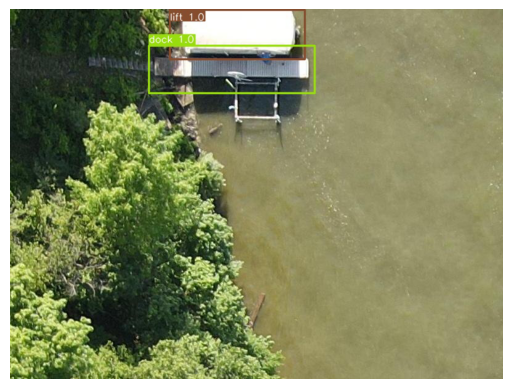

In [ ]:
image = plt.imread('/content/FasterRCNN42028/outputs/inference/res_9/100770.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!python inference.py --input /content/FasterRCNN42028/Object_Detection/pascal/test/img/101634.jpg --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.233


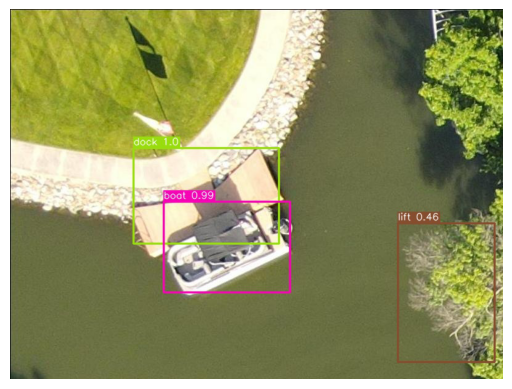

In [ ]:
image = plt.imread('/content/FasterRCNN42028/outputs/inference/res_12/101634.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!python inference.py --input /content/FasterRCNN42028/Object_Detection/pascal/test/img/101613.jpg --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.667


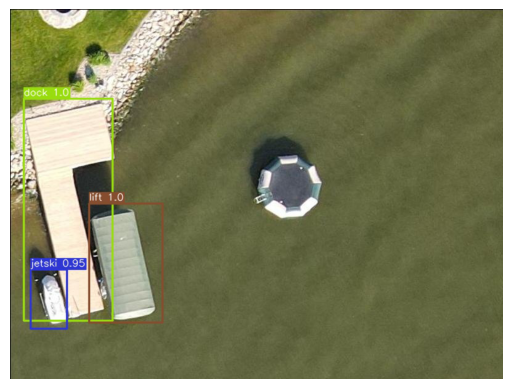

In [ ]:
image = plt.imread('/content/FasterRCNN42028/outputs/inference/res_13/101613.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!python inference.py --input /content/FasterRCNN42028/Object_Detection/pascal/test/img/101516.jpg --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.602


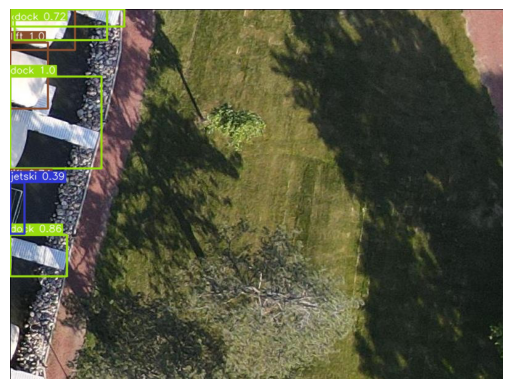

In [ ]:
image = plt.imread('/content/FasterRCNN42028/outputs/inference/res_14/101516.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!python inference.py --input /content/FasterRCNN42028/Object_Detection/pascal/test/img/101339.jpg --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.594


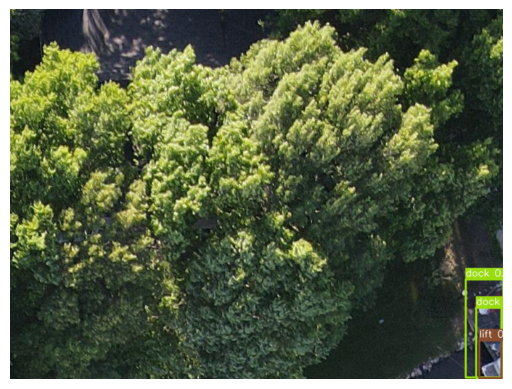

In [ ]:
image = plt.imread('/content/FasterRCNN42028/outputs/inference/res_16/101339.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!python inference.py --input /content/FasterRCNN42028/Object_Detection/pascal/test/img/101133.jpg --weights /content/drive/MyDrive/faster_rcnn_Od_ass2/best_model_2.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.064


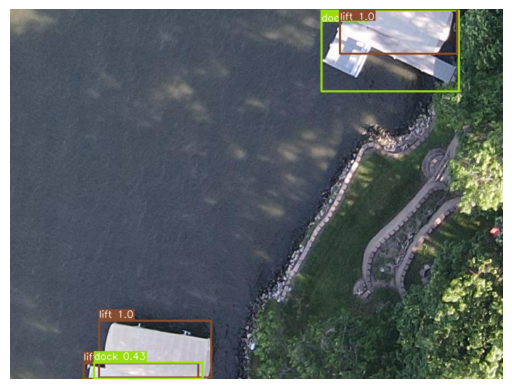

In [ ]:
image = plt.imread('/content/FasterRCNN42028/outputs/inference/res_15/101133.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()